<a href="https://colab.research.google.com/github/ZonaQuant/Notebooks/blob/main/Avance%20Descenso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yahoo_fin yfinance pandas numpy matplotlib


In [ ]:
pip install investpy

In [4]:
import yfinance as yf
import investpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = investpy.get_stocks()

data = data[data['country'] == 'united states']
tickers = list(data['symbol'])

In [ ]:
start = '2010-01-01'
df = yf.download(tickers, start, progress=True)['Close']

In [7]:
dfm = df.cummin()
dfm1 = df.cummax()
dfmin = pd.DataFrame(np.where(df == dfm,1,0))
dfmax = pd.DataFrame(np.where(df == dfm1,1,0))

In [9]:
returns = df.pct_change()[1:]*100
subenbajan = pd.DataFrame(np.where(returns>0,1,-1))
subenbajan.index = returns.index
subenbajan.columns = returns.columns
a=[]
d=[]

In [10]:
for i in range(len(subenbajan)):
    a.append(len(subenbajan.iloc[i][subenbajan.iloc[i]==1]))
    d.append(len(subenbajan.iloc[i][subenbajan.iloc[i]==-1]))

In [16]:
l = pd.DataFrame(a,d)
l = l.reset_index()
l.index = subenbajan.index
l.columns = ['Descenso','Avance']
l

,Descenso,Avance
Date,,
2010-01-04,4579,0
2010-01-05,3358,1221
2010-01-06,3281,1298
2010-01-07,3099,1480
2010-01-08,3013,1566
...,...,...
2022-02-14,3466,1113
2022-02-15,1408,3171
2022-02-16,2375,2204


In [12]:
l['RANA'] = (l['Avance']-l['Descenso'])/(l['Avance']+l['Descenso'])
l['AvanceEMA19'] = l['Avance'].ewm(span=19).mean()
l['AvanceEMA39'] = l['Avance'].ewm(span=39).mean()
l['Mcclellan'] = l['AvanceEMA19']-l['AvanceEMA39']
l['ad'] = l['Avance']-l['Descenso']
l['ratios/b'] = l['Avance']/l['Descenso']

In [13]:
print("\n"+"=="*20)
print("AMPLITUD DE MERCADO:", len(df.columns) ,"Empresas\n")
print("Suben hoy:", l['Avance'][-1])
print("Bajan hoy:", l['Descenso'][-1])
print("Suben semanal:", l['Avance'][-5:].sum())
print("Bajan semanal:", l['Descenso'][-5:].sum())
print("Suben mensual:", l['Avance'][-22:].sum())
print("Bajan mensual:", l['Descenso'][-22:].sum())
print("\nNuevos máximos hoy:", dfmax.iloc[-1].sum())
print("Nuevos mínimos hoy:", dfmin.iloc[-1].sum())
print("Nuevos máximos semanales:", dfmax.iloc[-5:].sum(axis=1).sum())
print("Nuevos mínimos semanales:", dfmin.iloc[-5:].sum(axis=1).sum())
print("Nuevos máximos mensuales:", dfmax.iloc[-22:].sum(axis=1).sum())
print("Nuevos mínimos mensuales:", dfmin.iloc[-22:].sum(axis=1).sum())
print("\nAvance/Descenso hoy:", l['ad'][-1])
print("Ratio Suben/bajan:", round(l['ratios/b'][-1],3))
print("Oscilador Mcclellan:", round(l['Mcclellan'][-1],3))
print("=="*20)


AMPLITUD DE MERCADO: 4579 Empresas

Suben hoy: 0
Bajan hoy: 4579
Suben semanal: 7178
Bajan semanal: 15717
Suben mensual: 37057
Bajan mensual: 63681

Nuevos máximos hoy: 0
Nuevos mínimos hoy: 0
Nuevos máximos semanales: 110
Nuevos mínimos semanales: 187
Nuevos máximos mensuales: 587
Nuevos mínimos mensuales: 1175

Avance/Descenso hoy: -4579
Ratio Suben/bajan: 0.0
Oscilador Mcclellan: -92.598


In [14]:
data = yf.download("^GSPC", start)['Close']

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


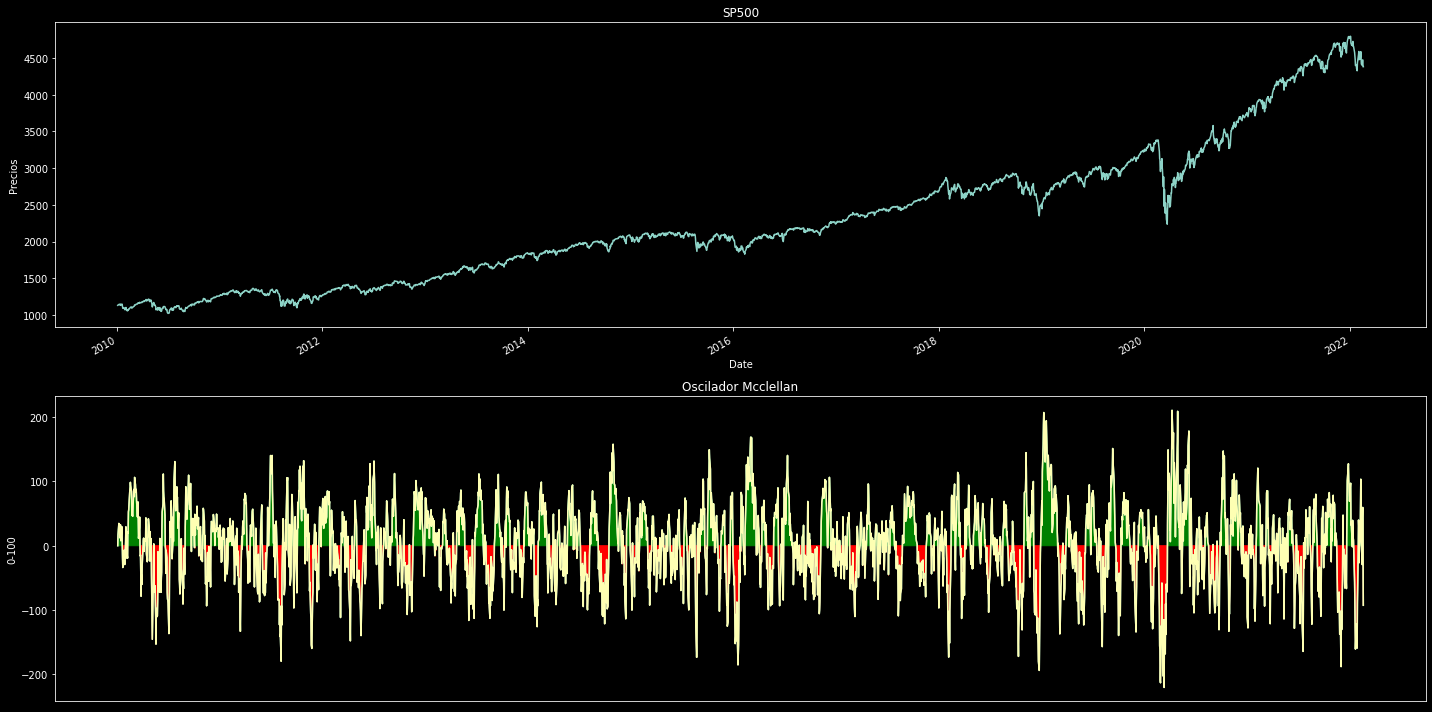

In [15]:

data = yf.download("^GSPC", start)['Close']

plt.style.use(['dark_background'])
fig,(ax,ax1) = plt.subplots(2, figsize=(20,10))
ax1.get_xaxis().set_visible('False')
data.plot(ax=ax, title="SP500", ylabel="Precios")
l['Mcclellan'].plot(ax=ax1, title="Oscilador Mcclellan", ylabel="0-100").fill_between(l.index,l['Mcclellan'], where=l['Mcclellan']>0, color='g')
l['Mcclellan'].plot(ax=ax1).fill_between(l.index,l['Mcclellan'], where=l['Mcclellan']<0, color='r')
ax1.get_xaxis().set_visible(False)
fig.tight_layout() 
plt.show()